HARIPRASAD SIVAPATHAM ANAND 

X2022gmv

In [2]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
pd.set_option('display.max_rows', 500) # Set max output 500
pd.set_option('display.max_columns',500)
import matplotlib.pyplot as plt

In [6]:
train_data = pd.read_csv("./smile_description_train.csv")
test_data = pd.read_csv("./smile_description_test.csv")

In [140]:
print("Training data length",len(train_data))
print("Testing data length", len(test_data))

Training data length 75383
Testing data length 10994


In [141]:
# Getting information about training data
train_data.info(verbose=-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75383 entries, 0 to 75382
Data columns (total 210 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    MaxEStateIndex            float64
 1    MinEStateIndex            float64
 2    MaxAbsEStateIndex         float64
 3    MinAbsEStateIndex         float64
 4    qed                       float64
 5    MolWt                     float64
 6    HeavyAtomMolWt            float64
 7    ExactMolWt                float64
 8    NumValenceElectrons       float64
 9    NumRadicalElectrons       float64
 10   MaxPartialCharge          float64
 11   MinPartialCharge          float64
 12   MaxAbsPartialCharge       float64
 13   MinAbsPartialCharge       float64
 14   FpDensityMorgan1          float64
 15   FpDensityMorgan2          float64
 16   FpDensityMorgan3          float64
 17   BCUT2D_MWHI               float64
 18   BCUT2D_MWLOW              float64
 19   BCUT2D_CHGHI              float64
 20   BCUT

In [142]:
# getting information about testing data
test_data.info(verbose=-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 209 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    MaxEStateIndex            float64
 1    MinEStateIndex            float64
 2    MaxAbsEStateIndex         float64
 3    MinAbsEStateIndex         float64
 4    qed                       float64
 5    MolWt                     float64
 6    HeavyAtomMolWt            float64
 7    ExactMolWt                float64
 8    NumValenceElectrons       float64
 9    NumRadicalElectrons       float64
 10   MaxPartialCharge          float64
 11   MinPartialCharge          float64
 12   MaxAbsPartialCharge       float64
 13   MinAbsPartialCharge       float64
 14   FpDensityMorgan1          float64
 15   FpDensityMorgan2          float64
 16   FpDensityMorgan3          float64
 17   BCUT2D_MWHI               float64
 18   BCUT2D_MWLOW              float64
 19   BCUT2D_CHGHI              float64
 20   BCUT

In [143]:
# train_data = train_data.dropna()

In [144]:
train_data.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,label,Assay_id
count,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,74963.000000,74963.000000,74963.000000,74963.000000,75383.000000,75383.000000,75383.000000,71564.000000,71564.000000,71564.000000,71564.000000,71564.000000,71564.000000,71564.000000,71564.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,7.538300e+04,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,75383.000000,7

In [145]:
test_data.isna().sum()

MaxEStateIndex                0
MinEStateIndex                0
MaxAbsEStateIndex             0
MinAbsEStateIndex             0
qed                           0
MolWt                         0
HeavyAtomMolWt                0
ExactMolWt                    0
NumValenceElectrons           0
NumRadicalElectrons           0
MaxPartialCharge             48
MinPartialCharge             48
MaxAbsPartialCharge          48
MinAbsPartialCharge          48
FpDensityMorgan1              0
FpDensityMorgan2              0
FpDensityMorgan3              0
BCUT2D_MWHI                 493
BCUT2D_MWLOW                493
BCUT2D_CHGHI                493
BCUT2D_CHGLO                493
BCUT2D_LOGPHI               493
BCUT2D_LOGPLOW              493
BCUT2D_MRHI                 493
BCUT2D_MRLOW                493
BalabanJ                      0
BertzCT                       0
Chi0                          0
Chi0n                         0
Chi0v                         0
Chi1                          0
Chi1n   

In [146]:
test_data.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Assay_id
count,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10946.000000,10946.000000,10946.000000,10946.000000,10994.000000,10994.000000,10994.000000,10501.000000,10501.000000,10501.000000,10501.000000,10501.000000,10501.000000,10501.000000,10501.000000,1.099400e+04,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,1.099400e+04,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.0,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.0,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,1099

In [156]:
# Removing columns producing null values
required_columns = []
for col in train_data:
    missing_values = train_data[col].isna().sum()
    if(missing_values!=0 and col!='label'):
        train_data = train_data.drop(col,axis=1)
    else:
        if(col!="label"):
            required_columns.append(col)

In [157]:
print(required_columns)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState

In [158]:
model = RandomForestClassifier(criterion="gini",max_depth=8,max_features="auto",n_estimators=100)

In [160]:
X = train_data[required_columns]
y = train_data["label"]

In [161]:
len(X.columns)

197

In [162]:
model.fit(X,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto')

In [163]:
print(len(model.feature_importances_))

197


In [164]:
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:10])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
    return df;

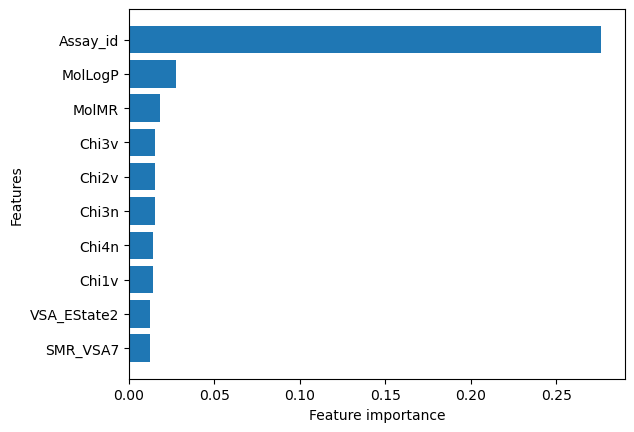

In [165]:
# As the following plot is not providing good corelation between features we will use another method
data = plot_features(X.columns,model.feature_importances_)

In [177]:
top_10 = data.features[0:10].tolist()
print(top_10)

['Assay_id', 'MolLogP', 'MolMR', 'Chi3v', 'Chi2v', 'Chi3n', 'Chi4n', 'Chi1v', 'VSA_EState2', 'SMR_VSA7']


In [178]:
# Using top 10 features
X = train_data[top_10]
y = train_data["label"]

In [179]:
model.fit(X,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto')

In [181]:
predict = model.predict(test_data[top_10])

In [182]:
print(np.count_nonzero(predict==1))
print(np.count_nonzero(predict==2))

210
10784


In [174]:
# sub_file = pd.read_csv("./data/sample_submission.csv")
# sub_file["Predicted"] = predict
# sub_file.to_csv("Submission_1_feb_4.csv",index=False)
# 0.55347 with top 10 features and random forest

In [183]:
sub_file = pd.read_csv("./data/sample_submission.csv")
sub_file["Predicted"] = predict
sub_file.to_csv("Submission_1_feb_5.csv",index=False)
# 0.48324 with 197 features and random forest

In [184]:
top_4 = data.features[0:4].tolist()

In [188]:
# Using top 4 features
X = train_data[top_4]
y = train_data["label"]

In [189]:
model.fit(X,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto')

In [190]:
predict = model.predict(test_data[top_4])

In [192]:
sub_file = pd.read_csv("./data/sample_submission.csv")
sub_file["Predicted"] = predict
sub_file.to_csv("Submission_1_feb_6.csv",index=False)
# 0.55356 accuracy using 4 features reducing features dosent increase accuracy

In [193]:
auc_socres = pd.read_csv("AUC_VALUES.csv")

In [194]:
auc_socres

,Columns,AUC_VALUES
0,Assay_Id,0.854496
1,BCUT2D_CHGHI,0.791767
2,BCUT2D_MRHI,0.791709
3,BCUT2D_LOGPHI,0.791671
4,BCUT2D_CHGLO,0.791207
5,Chi2v,0.790936
6,BCUT2D_MRLOW,0.790271
7,BCUT2D_LOGPLOW,0.790132
8,Chi3v,0.789785
9,Chi2n,0.789624


In [205]:
# Chosing columns with high auc scores
columns_based_on_table = ["Assay_id","MolWt","HeavyAtomMolWt"]

In [206]:
# Columns based on table 
X = train_data[columns_based_on_table]
y = train_data["label"]

In [207]:
model.fit(X,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto')

In [208]:
predict = model.predict(test_data[columns_based_on_table])

In [209]:
print(np.count_nonzero(predict==1))
print(np.count_nonzero(predict==2))

214
10780


In [210]:
sub_file = pd.read_csv("./data/sample_submission.csv")
sub_file["Predicted"] = predict
sub_file.to_csv("Submission_1_feb_8.csv",index=False)
# 0.55356 accuracy using 4 features reducing features dosent increase accuracy

In [3]:
auc_scores = pd.read_csv("./AUC_VALUES.csv")

In [37]:
auc_scores[auc_scores["AUC_VALUES"] > 0.7]

,Unnamed: 0,Columns,AUC_VALUES
0,208,label,1.000000
1,209,Assay_id,0.854489
2,19,BCUT2D_CHGHI,0.791780
3,21,BCUT2D_LOGPHI,0.791692
4,23,BCUT2D_MRHI,0.791675
5,20,BCUT2D_CHGLO,0.791218
6,34,Chi2v,0.790972
7,24,BCUT2D_MRLOW,0.790303
8,22,BCUT2D_LOGPLOW,0.790149
9,36,Chi3v,0.789833


## Selecting only top features

In [13]:
train_data = train_data.dropna()

In [14]:
X = train_data[["Assay_id","MaxAbsEStateIndex","MolWt","Kappa1","HeavyAtomMolWt"]]
y = train_data["label"]

In [15]:
y.value_counts()

2    61542
1    10022
Name: label, dtype: int64

In [16]:
from sklearn import svm
clf = svm.SVC()

In [17]:
clf.fit(X,y)

SVC()

In [19]:
predict = clf.predict(test_data[["Assay_id","MaxAbsEStateIndex","MolWt"]])

In [20]:
print(np.count_nonzero(predict==1))
print(np.count_nonzero(predict==2))

0
10994


In [22]:
sub_file = pd.read_csv("./data/sample_submission.csv")
sub_file["Predicted"] = predict
sub_file.to_csv("Submission_2_feb_1.csv",index=False)
# Using support vector mechine 0.4524

# Trying random forest with the features

In [23]:
X = train_data[["Assay_id","MaxAbsEStateIndex","MolWt"]]
y = train_data["label"]

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X,y)

RandomForestClassifier()

In [27]:
predict = model.predict(test_data[["Assay_id","MaxAbsEStateIndex","MolWt"]])

In [28]:
print(np.count_nonzero(predict==1))
print(np.count_nonzero(predict==2))

1200
9794


In [29]:
sub_file = pd.read_csv("./data/sample_submission.csv")
sub_file["Predicted"] = predict
sub_file.to_csv("Submission_2_feb_2.csv",index=False)
# 0.70361 accuracy using 3 features reducing features dosent increase accuracy

# Trying random forest with additional features

In [30]:
X = train_data[["Assay_id","MaxAbsEStateIndex","MolWt","Kappa1","HeavyAtomMolWt"]]
y = train_data["label"]

In [31]:
model = RandomForestClassifier()

In [32]:
model.fit(X,y)

RandomForestClassifier()

In [33]:
predict = model.predict(test_data[["Assay_id","MaxAbsEStateIndex","MolWt","Kappa1","HeavyAtomMolWt"]])

In [34]:
print(np.count_nonzero(predict==1))
print(np.count_nonzero(predict==2))

1299
9695


In [35]:
sub_file = pd.read_csv("./data/sample_submission.csv")
sub_file["Predicted"] = predict
sub_file.to_csv("Submission_2_feb_3.csv",index=False)